In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import sweetviz as sv

df_EDA = pd.read_csv('../../loan_project/SBAnational.csv')

/tmp/ipykernel_285297/1193700420.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_EDA = pd.read_csv('../../loan_project/SBAnational.csv')


In [2]:
df_EDA = df_EDA.drop(['Name','ChgOffDate', 'DisbursementDate','DisbursementGross','BalanceGross','ChgOffPrinGr'],axis=1)
df_EDA.head()

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,...,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,1000024006,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,...,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,1000034009,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,...,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,1000044001,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,...,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,1000054004,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,...,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"


In [3]:
duplicates = df_EDA[df_EDA.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [LoanNr_ChkDgt, City, State, Zip, Bank, BankState, NAICS, ApprovalDate, ApprovalFY, Term, NoEmp, NewExist, CreateJob, RetainedJob, FranchiseCode, UrbanRural, RevLineCr, LowDoc, MIS_Status, GrAppv, SBA_Appv]
Index: []

[0 rows x 21 columns]


In [4]:
df_EDA['ApprovalFY'] = pd.to_numeric(df_EDA['ApprovalFY'], errors='coerce')

df_EDA = df_EDA.dropna()
df_EDA

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,1000014003,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997.0,84,...,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,1000024006,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997.0,60,...,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,1000034009,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997.0,180,...,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,1000044001,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997.0,60,...,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,1000054004,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997.0,240,...,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997.0,60,...,1.0,0,0,1,0,0,N,P I F,"$70,000.00","$56,000.00"
899160,9995603000,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997.0,60,...,1.0,0,0,1,0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,9995613003,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997.0,108,...,1.0,0,0,1,0,N,N,P I F,"$300,000.00","$225,000.00"
899162,9995973006,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997.0,60,...,1.0,0,0,1,0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


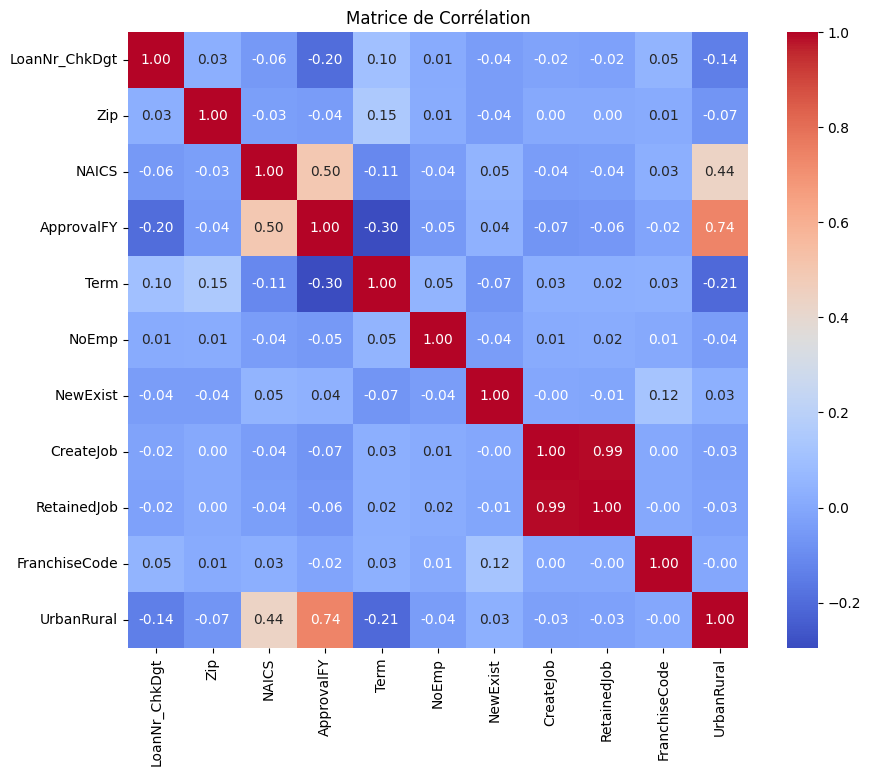

In [5]:
num_col = list(df_EDA.select_dtypes(include=[float,int]).columns)

correlation_matrix = df_EDA[num_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrice de Corrélation')

plt.show()

In [6]:
# my_report = sv.analyze(df_EDA)
# my_report.show_html()

In [7]:
df_EDA = df_EDA.drop(['LoanNr_ChkDgt',"ApprovalDate",'City','Bank','CreateJob','RetainedJob'],axis=1)
df_EDA

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997.0,84,4,2.0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,IN,46526,IN,722410,1997.0,60,2,2.0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,IN,47401,IN,621210,1997.0,180,7,1.0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,OK,74012,OK,0,1997.0,60,2,1.0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,FL,32801,FL,0,1997.0,240,14,1.0,1,0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,OH,43221,IL,451120,1997.0,60,6,1.0,1,0,0,N,P I F,"$70,000.00","$56,000.00"
899160,OH,43221,IL,451130,1997.0,60,6,1.0,1,0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,CA,93455,CA,332321,1997.0,108,26,1.0,1,0,N,N,P I F,"$300,000.00","$225,000.00"
899162,HI,96830,HI,0,1997.0,60,6,1.0,1,0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [8]:
# Dictionnaire de correspondance des codes NAICS aux catégories
df_EDA['NAICS_Category'] = df_EDA['NAICS'].astype(str).str[:2]
df_EDA['NAICS_Category'] = df_EDA['NAICS_Category'].astype(int)



naics_categories = {
    '0' : 'Inconnue',
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}

# Appliquer la correspondance à la colonne contenant les deux premiers chiffres des codes NAICS
df_EDA['NAICS_Category'] = df_EDA['NAICS'].astype(str).str[:2].map(naics_categories)

# On drop la colonne NAICS
df_EDA = df_EDA.drop('NAICS', axis=1)

df_EDA['GrAppv'] = pd.to_numeric(df_EDA['GrAppv'].str.replace('[\$,]', '', regex=True))
df_EDA['SBA_Appv'] = pd.to_numeric(df_EDA['SBA_Appv'].str.replace('[\$,]', '', regex=True))

df_EDA.head()

,State,Zip,BankState,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,NAICS_Category
0,IN,47711,OH,1997.0,84,4,2.0,1,0,N,Y,P I F,60000.0,48000.0,Retail Trade
1,IN,46526,IN,1997.0,60,2,2.0,1,0,N,Y,P I F,40000.0,32000.0,Accommodation and Food Services
2,IN,47401,IN,1997.0,180,7,1.0,1,0,N,N,P I F,287000.0,215250.0,Health Care and Social Assistance
3,OK,74012,OK,1997.0,60,2,1.0,1,0,N,Y,P I F,35000.0,28000.0,Inconnue
4,FL,32801,FL,1997.0,240,14,1.0,1,0,N,N,P I F,229000.0,229000.0,Inconnue


<Axes: xlabel='MIS_Status', ylabel='count'>

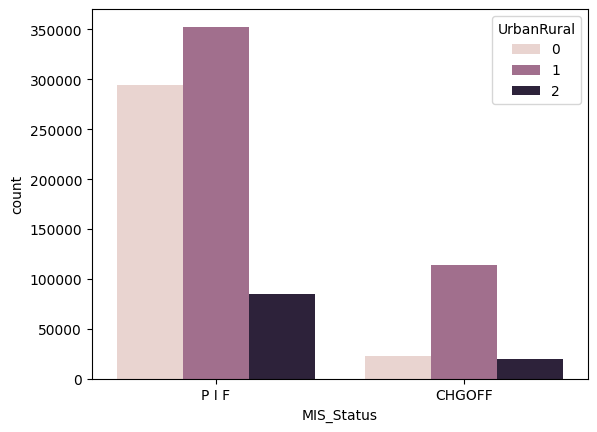

In [9]:
pd.crosstab(df_EDA['MIS_Status'], df_EDA['State'])
sns.countplot(x='MIS_Status', hue='UrbanRural', data=df_EDA)


<Axes: xlabel='MIS_Status', ylabel='Term'>

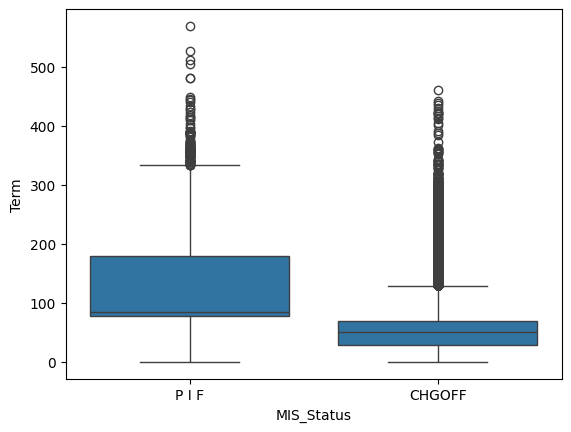

In [10]:
sns.boxplot(x='MIS_Status', y='Term', data=df_EDA)


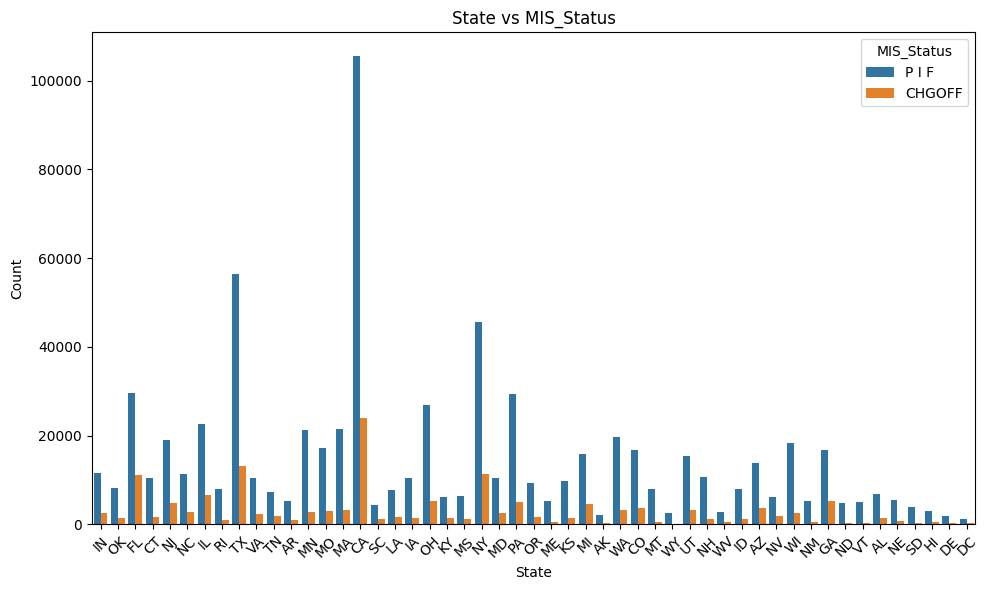

KeyboardInterrupt: 

In [12]:
categorical_features = ['State', 'Zip', 'BankState', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv', 'NAICS_Category']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='MIS_Status', data=df_EDA)
    plt.title(f'{feature} vs MIS_Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='MIS_Status', loc='upper right')
    plt.tight_layout()
    plt.show()


In [ ]:
numeric_features =['State', 'Zip', 'BankState', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv', 'NAICS_Category']
# Graphiques pour les caractéristiques numériques
numeric_features = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='MIS_Status', y=feature, data=df_EDA)
    plt.title(f'{feature} vs MIS_Status')
    plt.xlabel('MIS_Status')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()